In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
from librosa.feature import melspectrogram
from librosa.util import normalize
from librosa.display import waveplot

In [2]:
## Data library

dryCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Dry_cough/'
wetCoughData = 'C:/Users/tpaulraj/Dropbox/Projects/Cough Research/Cough-data/Wet_cough/'

In [3]:
#Read original data

def readCoughData(file):
    origData,origSampFreq = librosa.load(file, sr=None)
    return origData, origSampFreq

In [4]:
# resample original data to 16000 Khz

def resample(originalData, origSampFreq, targetSampFreq):
    resampledData = librosa.resample(y=origData, orig_sr=origSampFreq, target_sr=targetSampFreq)
    return resampledData

In [5]:
# Normalize Sound Data

def normalizeSound(resampledData, axis):
    """ Axis is 0 for row-wise and 1 
    for column wise"""
    normalizedData = normalize(resampledData, axis)
    return normalizedData

In [18]:
# Calculate Mel-Spectogram

def calculateMelSpectogram(normalizedData,sr, hop_length, win_length):
    #newSamplingFreq = 16000
    S=librosa.feature.melspectrogram(normalizedData, sr=sr, hop_length=hop_length, win_length=win_length)
    return S

In [7]:
# plot orginal time domain data

def plotSound(soundData, sr, x_axis_string):
    waveplot(soundData, sr, x_axis=x_axis_string)

In [23]:
#Plot melspectogram

def plotMelSpectogram(S, sr, ref=np.max):
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=16000,)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [33]:
origData, origSampFreq= readCoughData(wetCoughData+'Wet cough 32.m4a')

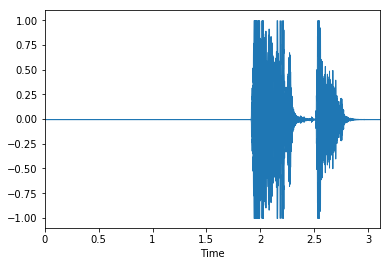

In [40]:
plotSound(soundData=origData, sr=origSampFreq, x_axis_string='time')

In [42]:
targetSampFreq = 16000

In [43]:
resampledData = resample(originalData=origData, origSampFreq=origSampFreq, targetSampFreq=targetSampFreq)

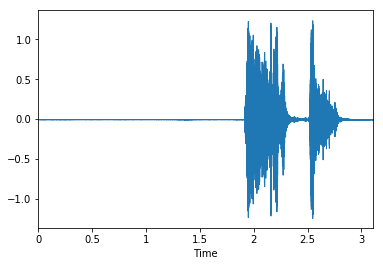

In [48]:
plotSound(resampledData,sr=targetSampFreq,x_axis_string='time')

In [44]:
normalizedData = normalizeSound(resampledData, axis=0)

In [52]:
S = calculateMelSpectogram(normalizedData,sr=targetSampFreq, hop_length=512, win_length=1024)

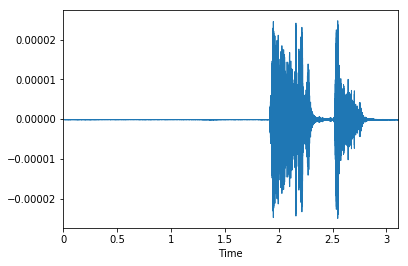

In [46]:
plotSound(soundData=normalizedData, sr=targetSampFreq,x_axis_string='time')

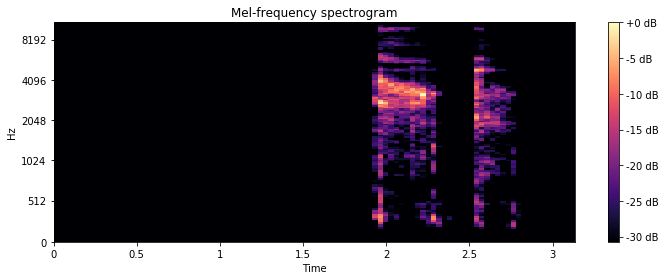

In [47]:
plotMelSpectogram(S, sr=targetSampFreq, ref=np.max)

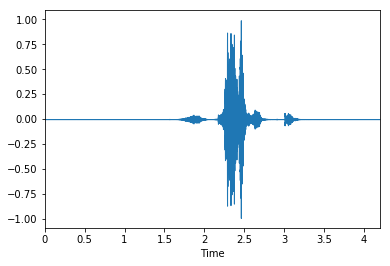

In [22]:
plotSound(origData, sr=origSampFreq, x_axis_string='time')

In [ ]:
readdata - resample - normalize - melspectogram - plotactual data - plot melspectogram

In [51]:
def featureExtraction(audioFile, targetSampFreq, axis, hop_length,win_length):
    origData, origSampFreq = readCoughData(audioFile)
    resampledData = resample(originalData, origSampFreq, targetSampFreq=targetSampFreq)
    normalizedData = normalizeSound(resampledData, axis=axis)
    S = calculateMelSpectogram(normalizedData, sr=targetSampFreq, hop_length, win_length)
    plotSound(soundData=normalizedData, sr=targetSampFreq,x_axis_string='time')
    plotMelSpectogram(S, sr=targetSampFreq, ref=np.max)

SyntaxError: positional argument follows keyword argument (<ipython-input-51-8427f8509650>, line 5)

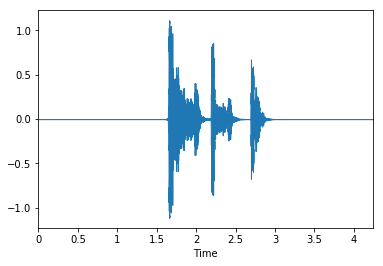

In [40]:
librosa.display.waveplot(y_16k, sr=16000, x_axis='time')

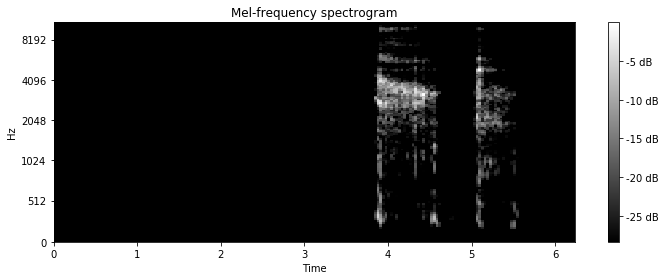

In [32]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=16000, cmap='gray')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()